## Задание

Входные данные:

> - <code>services.csv</code> - сводный датасет с данными по пользованию сорока услугами и сервисам в г. Москвы за 2020 год
> - <code>name_services.csv</code> - справочник услуг и сервисов
> - <code>name_services_1.csv</code> - справочник услуг и сервисов
> - <code>name_services_2.csv</code> - справочник услуг и сервисов

Примечание: данные поступают из разных источников, в связи с этим мы имеем несколько справочников.

Описание колонок <code>services.csv</code>:

> - <code>SSOID</code> - уникальный идентификатор пользователя
> - <code>USER_TYPE</code> - тип учетной записи пользователя (в зависимости от внесенных данных в учетной записи)
> - <code>SERVICE_ID</code> - идентификатор услуги
> - <code>EXTRACT(YEARFROMRQ."DATA")</code> - год

Задача:

- Объединить данные и произвести чистку данных, сделать выводы.
- Установить самые популярные и самые непопулярные услуги, сделать выводы.
- Посмотреть распределения по пользователям различных услуг, сделать выводы.
- Попробовать найти взаимосвязь между услугами и сервисами (есть пользователи которые пользуются одним и тем же набором услуг) на примере нескольких услуг.

In [1]:
#импорт библиотек
import pandas as pd
import re

In [2]:
#загрузка файлов данных
services = pd.read_csv('services.csv', sep=',')
name = pd.read_csv('name_services.csv', sep=',')
name1 = pd.read_csv('name_services_1.csv', sep=',')


In [3]:
services

,Unnamed: 0,SSOID,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")"
0,0,0,Стандартная,dogm_journal,2020
1,1,1,Стандартная,dogm_journal,2020
2,2,2,Упрощенная,dogm_journal,2020
3,3,3,Стандартная,dogm_journal,2020
4,4,4,Стандартная,dogm_journal,2020
...,...,...,...,...,...
11693735,11693735,2716213,Стандартная,067201,2020
11693736,11693736,7647285,Полная,-47,2020
11693737,11693737,3640568,Стандартная,058501,2020
11693738,11693738,1211284,Стандартная,mosenergo_counters,2020


In [3]:
# Прочитаем файл и запишем в новый с заменой 1-й запятой на другой разделитель, т.к. запятые сожержатся в названиях столбца NAME
with open ('name_services_2.csv', 'r', encoding = 'utf-8') as name_2:
    with open('name_services_new.csv', 'w', encoding = 'utf-8') as new_name_2:
        for line in name_2:
            new_line = re.sub (r',' ,'|', line, 1)
            #print(new_line)
            new_name_2.write(new_line + '\n')

In [4]:
list(open('name_services_new.csv', 'r', encoding = 'utf-8')) # Откроем новый файл для чтения

['"SERVICE_ID"|"NAME"\n',
 '\n',
 'guis_062301|Выдача единого платежного документа (ЕПД)\n',
 '\n',
 "Прием показания|Прием показаний приборов учёта воды'\n",
 '\n',
 "Удаление показания|Прием показаний приборов учёта воды'\n",
 '\n',
 'clinics_review|Запись к врачу по направлениям, на процедуры. Перенос записи к врачу. Отмена записи к врачу\n',
 '\n',
 'clinics_reg|Запись к врачу по направлениям, на процедуры. Перенос записи к врачу. Отмена записи к врачу\n',
 '\n',
 'clinics_shift|Запись к врачу по направлениям, на процедуры. Перенос записи к врачу. Отмена записи к врачу\n',
 '\n',
 'dogm_journal|Электронный дневник\n',
 '\n',
 'gibdd_fines|Штрафы ГИБДД г. Москвы\n',
 '\n',
 'mosmetro_troyka|Пополнение карты «Тройка»\n',
 '\n',
 'taxi_zapros|Поиск такси в реестре выданных разрешений\n',
 '\n',
 'mosenergo_counters|Прием показаний электросчетчиков\n',
 '\n',
 'mfc_status|Поиск обращений, поданных через центры госуслуг\n']

In [5]:
name2 = pd.read_csv('name_services_new.csv', sep = '|') 

In [6]:
#name2.merge(name, how = 'inner') #проверим, есть ли одинаковые значения в справочниках
#name2.merge(name1, how = 'inner')
name.merge(name1, how = 'inner')

,SERVICE_ID,NAME
0,058201,Единый платежный документ (ЕПД) для нежилых по...
1,061001,Запись на проведение контрольно-геодезической ...
2,061101,Запись домашнего животного на прием к ветерина...
3,064701,Запись в офис МОСГОРТУР


In [8]:
all_names = name.merge(name1, how = 'outer').merge(name2, how = 'outer')
all_names #Соединим в общий справочник. По количеству строк видно, что избавились от повторения значений в SERVICE_ID

,SERVICE_ID,NAME
0,500003,Предоставление специально оборудованных жилых ...
1,010193,Предоставление гражданам возможности участия в...
2,010194,Предоставление гражданам возможности смены при...
3,010192,Выявление разрешений на осуществление таксомот...
4,010181,"Выплата ежегодной компенсации детям, потерявши..."
...,...,...
973,gibdd_fines,Штрафы ГИБДД г. Москвы
974,mosmetro_troyka,Пополнение карты «Тройка»
975,taxi_zapros,Поиск такси в реестре выданных разрешений
976,mosenergo_counters,Прием показаний электросчетчиков


In [9]:
new_merge = services.merge(all_names, how = 'outer', on = 'SERVICE_ID') # объединяем всё и видим, какие услуги популярные, 
#а какими не пользуются
new_merge

,Unnamed: 0,SSOID,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
0,0.0,0.0,Стандартная,dogm_journal,2020.0,Электронный дневник
1,1.0,1.0,Стандартная,dogm_journal,2020.0,Электронный дневник
2,2.0,2.0,Упрощенная,dogm_journal,2020.0,Электронный дневник
3,3.0,3.0,Стандартная,dogm_journal,2020.0,Электронный дневник
4,4.0,4.0,Стандартная,dogm_journal,2020.0,Электронный дневник
...,...,...,...,...,...,...
12087789,NaN,NaN,NaN,mvk,NaN,Мосводоканал
12087790,NaN,NaN,NaN,dogm_04201,NaN,Предоставление информации о результатах госуда...
12087791,NaN,NaN,NaN,health,NaN,Здоровье
12087792,NaN,NaN,NaN,zhku,NaN,ЖКУ


In [10]:
new_merge.isna().any() # В столбце NAME нет NaN, значит использовали все справочники, а в SSOID есть NaN, следовательно
# некоторыми услугами не пользовались

Unnamed: 0                     True
SSOID                          True
USER_TYPE                      True
SERVICE_ID                    False
EXTRACT(YEARFROMRQ."DATA")     True
NAME                          False
dtype: bool

In [10]:
no_client = new_merge.loc[(new_merge['SSOID'].isnull())] # посмотрим, какими услугами не пользуются. Из 978 не пользуются 933
no_client.NAME.unique()
no_client = pd.DataFrame(no_client)
no_client

,Unnamed: 0,SSOID,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
12086861,NaN,NaN,NaN,500003,NaN,Предоставление специально оборудованных жилых ...
12086862,NaN,NaN,NaN,010193,NaN,Предоставление гражданам возможности участия в...
12086863,NaN,NaN,NaN,010194,NaN,Предоставление гражданам возможности смены при...
12086864,NaN,NaN,NaN,010192,NaN,Выявление разрешений на осуществление таксомот...
12086865,NaN,NaN,NaN,010181,NaN,"Выплата ежегодной компенсации детям, потерявши..."
...,...,...,...,...,...,...
12087789,NaN,NaN,NaN,mvk,NaN,Мосводоканал
12087790,NaN,NaN,NaN,dogm_04201,NaN,Предоставление информации о результатах госуда...
12087791,NaN,NaN,NaN,health,NaN,Здоровье
12087792,NaN,NaN,NaN,zhku,NaN,ЖКУ


In [11]:
new_merge_drop = new_merge.dropna() # Удалим Nan для дальнейшего анализа
new_merge_drop.shape

(12086861, 6)

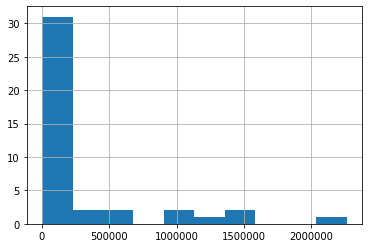

In [42]:
new_merge_drop['NAME'].value_counts().hist(); #Построим график распределения услуг. Распределение неравномерное, в данных есть выбросы

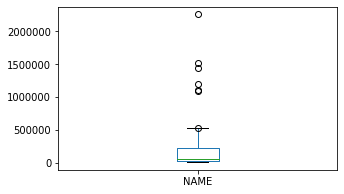

In [34]:
new_merge_drop['NAME'].value_counts().plot(kind='box', figsize = (5, 3)); # Отлично видно выбросы по количеству

In [14]:
# Оставим категориальные столбцы для get_dummies, чтобы найти строки, повторяющиеся 2 и более раза
df = new_merge_drop[['SSOID', 'USER_TYPE', 'NAME']].set_index('SSOID')

In [15]:
df1 = pd.get_dummies(df)

In [15]:
# ID клиентов, которые повторяются по услугам
df1[df1.duplicated(subset = df1.columns)]

,USER_TYPE_ERR,USER_TYPE_Полная,USER_TYPE_Стандартная,USER_TYPE_Упрощенная,NAME_Выдача единого платежного документа (ЕПД),NAME_Запись домашнего животного на прием к ветеринарному врачу,"NAME_Запись к врачу по направлениям, на процедуры. Перенос записи к врачу. Отмена записи к врачу",NAME_Запись на прием к экспертам,"NAME_Запись на участие в государственной итоговой аттестации (ЕГЭ, ГВЭ)","NAME_Запись на участие в государственной итоговой аттестации (ОГЭ, ГВЭ)",...,NAME_Прием заявлений на запись в образовательную организацию (дошкольные группы),"NAME_Прием и регистрация заявлений на обучение по программам среднего профессионального образования в образовательные организации города Москвы, реализующие образовательные программы среднего профессионального образования",NAME_Прием показаний приборов учёта воды',NAME_Прием показаний электросчетчиков,NAME_Прикрепление взрослого населения города Москвы к стоматологической поликлинике,"NAME_Прикрепление граждан, застрахованных по ОМС, к государственным учреждениям здравоохранения города Москвы",NAME_Просмотр информации по очередности при записи в детский сад,NAME_Проходы и питание в школах,NAME_Штрафы ГИБДД г. Москвы,NAME_Электронный дневник
SSOID,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11692953.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1232460.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4545725.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
new_merge_pivot = new_merge_drop.pivot_table(index ='NAME', values = ['SSOID','SERVICE_ID'], aggfunc = 'count').sort_values(by = 'SSOID', ascending = False).reset_index()
# Популярная услуга - Прием показаний приборов учёта воды. Непопулярная - Запись на прием к экспертам
new_merge_pivot_id = new_merge_drop.pivot_table(index ='SERVICE_ID', values = ['SSOID','NAME'], aggfunc = 'count').sort_values(by = 'SSOID', ascending = False).reset_index()
new_merge_pivot_id

,SERVICE_ID,NAME,SSOID
0,Прием показания,1952863,1952863
1,dogm_journal,1439546,1439546
2,067201,1201810,1201810
3,ispp,1107936,1107936
4,clinics_reg,880252,880252
5,clinics_shift,614502,614502
6,-47,559304,559304
7,mosenergo_counters,533902,533902
8,guis_062301,528591,528591
9,gibdd_fines,519657,519657


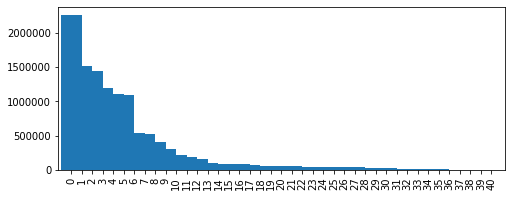

In [22]:
#Построим график по количеству используемых услуг
new_merge_pivot['SERVICE_ID'].plot(kind='bar', figsize=(8, 3), width=2);

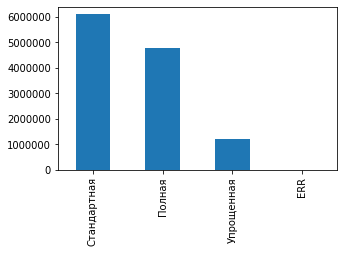

In [32]:
new_merge.USER_TYPE.value_counts().plot(kind = 'bar', figsize=(5, 3)); # Из графика видно, что стандартных типов учётных записей
# больше остальных

In [16]:
# Сгруппируем услуги по пользователям
pivot_ = new_merge_drop[['SERVICE_ID', 'SSOID']]
new_merge_pivot_user = pivot_.pivot_table(pivot_,index =['SSOID', 'SERVICE_ID'], aggfunc = 'count').reset_index()
new_merge_pivot_user

,SSOID,SERVICE_ID
0,0.0,063101
1,0.0,77060701
2,0.0,clinics_reg
3,0.0,dogm_journal
4,0.0,ispp
...,...,...
11693735,11693702.0,Прием показания
11693736,11693708.0,dogm_journal
11693737,11693709.0,dogm_journal
11693738,11693725.0,dogm_journal


In [ ]:
# Проведём анализ по группам учётных записей

In [36]:
standart = new_merge_drop.loc[(new_merge_drop.USER_TYPE == 'Стандартная')]
standart.set_index('SSOID')

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
0.0,0.0,Стандартная,dogm_journal,2020.0,Электронный дневник
1.0,1.0,Стандартная,dogm_journal,2020.0,Электронный дневник
3.0,3.0,Стандартная,dogm_journal,2020.0,Электронный дневник
4.0,4.0,Стандартная,dogm_journal,2020.0,Электронный дневник
5.0,5.0,Стандартная,dogm_journal,2020.0,Электронный дневник
...,...,...,...,...,...
10744096.0,11691846.0,Стандартная,057501,2020.0,Подача обращения в Московскую административную...
7597325.0,11692059.0,Стандартная,057501,2020.0,Подача обращения в Московскую административную...
11692953.0,11692953.0,Стандартная,057501,2020.0,Подача обращения в Московскую административную...


In [37]:
standart_service = standart.groupby('NAME').count()
standart_service.sort_values(by = 'SSOID') # Самая популярная и непопулярная услуга совпадает с генеральной совокупностью

,Unnamed: 0,SSOID,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")"
NAME,,,,,
Запись на прием к экспертам,1275,1275,1275,1275,1275
Пополнение карты «Тройка»,2250,2250,2250,2250,2250
Получение информации об эвакуации транспортного средства,2348,2348,2348,2348,2348
Отмена записи на медкомиссию,2634,2634,2634,2634,2634
Запись на участие в итоговом сочинении (изложении),5596,5596,5596,5596,5596
Поиск такси в реестре выданных разрешений,7041,7041,7041,7041,7041
"Предоставление информации о факте получения, неполучения (или о размере) пособий, компенсаций и других социальных выплат",7401,7401,7401,7401,7401
"Предоставление информации об очередности граждан, состоящих на жилищном учете",8109,8109,8109,8109,8109
Назначение и предоставление ежемесячной компенсационной выплаты на возмещение расходов в связи с ростом стоимости жизни многодетным семьям,8619,8619,8619,8619,8619


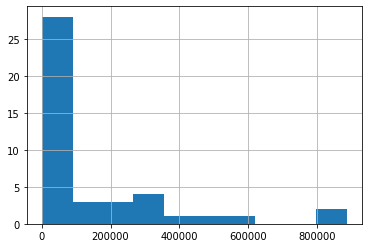

In [40]:
standart.SERVICE_ID.value_counts().hist();

In [51]:
standart_user = standart.groupby('SSOID').count()
standart_user.sort_values(by = 'SERVICE_ID') # Максимальное количество услуг 20 от одного пользователя

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
3487546.0,1,1,1,1,1
5385575.0,1,1,1,1,1
5385573.0,1,1,1,1,1
5385559.0,1,1,1,1,1
5385556.0,1,1,1,1,1
...,...,...,...,...,...
212725.0,19,19,19,19,19
1438538.0,19,19,19,19,19
2875943.0,20,20,20,20,20


In [44]:
# Клиенты с полной учётной записью
full = new_merge_drop.loc[(new_merge_drop.USER_TYPE == 'Полная')]
full.set_index('SSOID')

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
7.0,7.0,Полная,dogm_journal,2020.0,Электронный дневник
9.0,9.0,Полная,dogm_journal,2020.0,Электронный дневник
11.0,11.0,Полная,dogm_journal,2020.0,Электронный дневник
14.0,14.0,Полная,dogm_journal,2020.0,Электронный дневник
24.0,24.0,Полная,dogm_journal,2020.0,Электронный дневник
...,...,...,...,...,...
5441041.0,11692283.0,Полная,057501,2020.0,Подача обращения в Московскую административную...
11692333.0,11692333.0,Полная,057501,2020.0,Подача обращения в Московскую административную...
11692844.0,11692844.0,Полная,057501,2020.0,Подача обращения в Московскую административную...


In [58]:
full_service = full.groupby('NAME').count()
full_service.sort_values(by = 'SSOID') #Здесь изменились популярная и непопулярная услуги

,Unnamed: 0,SSOID,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")"
NAME,,,,,
Запись на участие в итоговом сочинении (изложении),943,943,943,943,943
Запись на прием к экспертам,1598,1598,1598,1598,1598
Пополнение карты «Тройка»,1981,1981,1981,1981,1981
Получение информации об эвакуации транспортного средства,2645,2645,2645,2645,2645
Отмена записи на медкомиссию,3564,3564,3564,3564,3564
Запись на участие в итоговом собеседовании по русскому языку для выпускников 9 классов,5009,5009,5009,5009,5009
"Прием и регистрация заявлений на обучение по программам среднего профессионального образования в образовательные организации города Москвы, реализующие образовательные программы среднего профессионального образования",6594,6594,6594,6594,6594
Поиск такси в реестре выданных разрешений,7426,7426,7426,7426,7426
"Предоставление информации об очередности граждан, состоящих на жилищном учете",7592,7592,7592,7592,7592


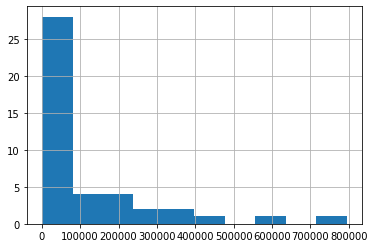

In [47]:
full.SERVICE_ID.value_counts().hist();

In [60]:
full_user = full.groupby('SSOID').count()
full_user.sort_values(by = 'SERVICE_ID') # Максимальное количество услуг 22 от одного пользователя

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
3097898.0,1,1,1,1,1
5006232.0,1,1,1,1,1
5006244.0,1,1,1,1,1
5006245.0,1,1,1,1,1
5006246.0,1,1,1,1,1
...,...,...,...,...,...
960222.0,20,20,20,20,20
141029.0,21,21,21,21,21
982169.0,21,21,21,21,21


In [45]:
simple = new_merge_drop.loc[(new_merge_drop.USER_TYPE == 'Упрощенная')]
simple.set_index('SSOID')

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
2.0,2.0,Упрощенная,dogm_journal,2020.0,Электронный дневник
10.0,10.0,Упрощенная,dogm_journal,2020.0,Электронный дневник
12.0,12.0,Упрощенная,dogm_journal,2020.0,Электронный дневник
21.0,21.0,Упрощенная,dogm_journal,2020.0,Электронный дневник
33.0,33.0,Упрощенная,dogm_journal,2020.0,Электронный дневник
...,...,...,...,...,...
11564662.0,11564662.0,Упрощенная,057501,2020.0,Подача обращения в Московскую административную...
8422739.0,11571627.0,Упрощенная,057501,2020.0,Подача обращения в Московскую административную...
11587681.0,11587681.0,Упрощенная,057501,2020.0,Подача обращения в Московскую административную...


In [31]:
simple_service = simple.groupby('NAME').count()
simple_service.sort_values(by = 'SSOID') # Непопулярная услуга отличается от двух предыдущих групп

,Unnamed: 0,SSOID,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")"
NAME,,,,,
Запись на участие в итоговом сочинении (изложении),1,1,1,1,1
Запись на прием к экспертам,4,4,4,4,4
"Предоставление информации о факте получения, неполучения (или о размере) пособий, компенсаций и других социальных выплат",6,6,6,6,6
Назначение и предоставление ежемесячной компенсационной выплаты на возмещение расходов в связи с ростом стоимости жизни многодетным семьям,14,14,14,14,14
"Предоставление информации об очередности граждан, состоящих на жилищном учете",14,14,14,14,14
Назначение и предоставление ежегодной компенсационной выплаты на приобретение комплекта детской одежды для посещения занятий на период обучения,15,15,15,15,15
Назначение и предоставление единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка,15,15,15,15,15
Медкомиссия ГИБДД,16,16,16,16,16
Назначение и предоставление ежемесячного пособия на ребенка в городе Москве,17,17,17,17,17


In [33]:
simple_user = simple.groupby('SSOID').count()
simple_user.sort_values(by = 'SERVICE_ID') # Максимальное количество услуг 13 от одного пользователя

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
2.0,1,1,1,1,1
6996252.0,1,1,1,1,1
6996258.0,1,1,1,1,1
6996599.0,1,1,1,1,1
6996635.0,1,1,1,1,1
...,...,...,...,...,...
79516.0,11,11,11,11,11
2373768.0,12,12,12,12,12
1233936.0,12,12,12,12,12


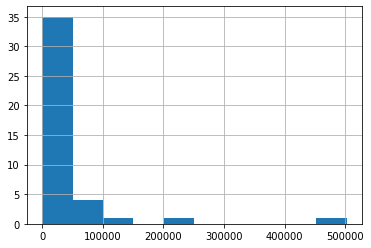

In [46]:
simple.SERVICE_ID.value_counts().hist();

In [48]:
err = new_merge_drop.loc[(new_merge_drop.USER_TYPE == 'ERR')]
err.set_index('SSOID') 

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
1764441.0,1764441.0,ERR,dogm_journal,2020.0,Электронный дневник
2397243.0,2397243.0,ERR,dogm_journal,2020.0,Электронный дневник
4408712.0,4408712.0,ERR,dogm_journal,2020.0,Электронный дневник
5846344.0,5846344.0,ERR,dogm_journal,2020.0,Электронный дневник
1225813.0,11070957.0,ERR,dogm_journal,2020.0,Электронный дневник
...,...,...,...,...,...
3908029.0,3912142.0,ERR,guis_062301,2020.0,Выдача единого платежного документа (ЕПД)
3693406.0,5158035.0,ERR,guis_062301,2020.0,Выдача единого платежного документа (ЕПД)
2554902.0,5477932.0,ERR,guis_062301,2020.0,Выдача единого платежного документа (ЕПД)


In [36]:
err_service = err.groupby('NAME').count()
err_service.sort_values(by = 'SSOID') # Непопулярная услуга совпадает с генеральной совокупностью

,Unnamed: 0,SSOID,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")"
NAME,,,,,
Поиск такси в реестре выданных разрешений,1,1,1,1,1
Запись на прием к экспертам,1,1,1,1,1
Оформление социальной карты студента,1,1,1,1,1
Подача заявления о предоставлении питания за счет средств бюджета города Москвы,1,1,1,1,1
Подача обращения в Московскую административную дорожную инспекцию или Администратору Московского парковочного пространства,1,1,1,1,1
"Поиск обращений, поданных через центры госуслуг",1,1,1,1,1
Перенос записи к врачу,2,2,2,2,2
"Предоставление информации о результатах государственной итоговой аттестации по образовательным программам основного общего и среднего общего образования, итоговом сочинении (изложении)",2,2,2,2,2
"Прием заявлений и направление на зачисление в государственные образовательные организации, реализующие дополнительные общеобразовательные программы, подведомственные Департаменту образования города Москвы",2,2,2,2,2


In [37]:
err_user = err.groupby('SSOID').count()
err_user.sort_values(by = 'SERVICE_ID') # Максимальное количество услуг 7 от одного пользователя

,Unnamed: 0,USER_TYPE,SERVICE_ID,"EXTRACT(YEARFROMRQ.""DATA"")",NAME
SSOID,,,,,
308766.0,1,1,1,1,1
10828827.0,1,1,1,1,1
10781191.0,1,1,1,1,1
8862370.0,1,1,1,1,1
8343228.0,1,1,1,1,1
6723785.0,1,1,1,1,1
6556464.0,1,1,1,1,1
6256880.0,1,1,1,1,1
5846344.0,1,1,1,1,1


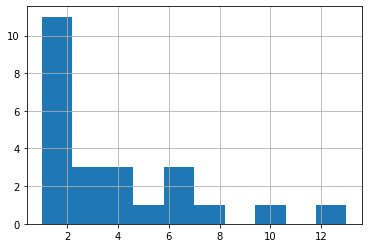

In [49]:
err.SERVICE_ID.value_counts().hist();